In [1]:
import pandas as pd

# 1. pandas数据结构

## series数据结构：类似于一位数组

In [6]:
obj1=pd.Series([1,-2,3,4])

In [7]:
obj1

0    1
1   -2
2    3
3    4
dtype: int64

In [9]:
obj2=pd.Series([1,-2,3,4],index=list("abcd"))

In [10]:
obj2

a    1
b   -2
c    3
d    4
dtype: int64

In [12]:
obj2.values

array([ 1, -2,  3,  4], dtype=int64)

In [14]:
obj2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [15]:
obj2['c']

3

In [17]:
obj2[['a','c']]

a    1
c    3
dtype: int64

In [19]:
import numpy as np

In [20]:
np.abs(obj2)

a    1
b    2
c    3
d    4
dtype: int64

In [22]:
data={
    "zhangsan":92,
    "lisi":88,
    "wangwu":99,
    "zhaoliu":81,
}

In [24]:
obj3=pd.Series(data)

In [25]:
obj3

zhangsan    92
lisi        88
wangwu      99
zhaoliu     81
dtype: int64

In [27]:
obj3.name="math"
obj3.index.name="student"

In [28]:
obj3

student
zhangsan    92
lisi        88
wangwu      99
zhaoliu     81
Name: math, dtype: int64

## DataFrame数据结构：表格型数据

In [29]:
new_data={
    "name":["zhangsan","lisi","wangwu","zhaoliu"],
    "sex":["female","female","male","male"],
    "year":[2001,2001,2003,2002],
    "city":["beijing","shanghai","guangzhou","beijing"]
}

In [31]:
df=pd.DataFrame(new_data)

In [32]:
df

,name,sex,year,city
0,zhangsan,female,2001,beijing
1,lisi,female,2001,shanghai
2,wangwu,male,2003,guangzhou
3,zhaoliu,male,2002,beijing


In [33]:
df2=pd.DataFrame(new_data,columns=["name","sex","year","city"],index=list("abcd"))

In [34]:
df2

,name,sex,year,city
a,zhangsan,female,2001,beijing
b,lisi,female,2001,shanghai
c,wangwu,male,2003,guangzhou
d,zhaoliu,male,2002,beijing


In [35]:
df2.columns

Index(['name', 'sex', 'year', 'city'], dtype='object')

In [36]:
df2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [38]:
type(df2.index)

pandas.core.indexes.base.Index

In [40]:
type(df2.columns)

pandas.core.indexes.base.Index

## 创建DataFrame数据类型可以接受的数据类型
* 二维ndarray 数据矩阵，可以传入行列索引
* 数组、列表、元组构成的字典
* 由Serise构成的字典，每个Series构成一列，Series索引合并为行索引
* 嵌套字典
* 字典或Series的列表
* 列表或者是元组组成的列表

In [44]:
df2.index.name="student_id"
df2.columns.name="student_info"

In [45]:
df2

student_info,name,sex,year,city
student_id,,,,
a,zhangsan,female,2001,beijing
b,lisi,female,2001,shanghai
c,wangwu,male,2003,guangzhou
d,zhaoliu,male,2002,beijing


In [47]:
df2.values

array([['zhangsan', 'female', 2001, 'beijing'],
       ['lisi', 'female', 2001, 'shanghai'],
       ['wangwu', 'male', 2003, 'guangzhou'],
       ['zhaoliu', 'male', 2002, 'beijing']], dtype=object)

## Serise索引、DataFrame行索引和列索引都可以作为索引对象

In [49]:
df2["sex"]

student_id
a    female
b    female
c      male
d      male
Name: sex, dtype: object

In [56]:
df2.index

Index(['a', 'b', 'c', 'd'], dtype='object', name='student_id')

In [62]:
df2.iloc[0]

student_info
name    zhangsan
sex       female
year        2001
city     beijing
Name: a, dtype: object

In [64]:
df2.loc['a']

student_info
name    zhangsan
sex       female
year        2001
city     beijing
Name: a, dtype: object

# 2. pandas索引操作

In [82]:
obj=pd.Series([1,-2,3,-4],index=['b','a','c','d'])

In [83]:
obj

b    1
a   -2
c    3
d   -4
dtype: int64

In [84]:
obj.reindex(list('abcde'))

a   -2.0
b    1.0
c    3.0
d   -4.0
e    NaN
dtype: float64

In [85]:
obj

b    1
a   -2
c    3
d   -4
dtype: int64

## 重新索引时遇到不存在的索引值会引入缺失值，也可以通过method方法进行缺失值自动填充，参数值为“ffill”或“pad”时为向前填充，即用前一个值补充缺失值，参数值为“backfill”或者“bfill”时为向后填充，即用缺失值的后一个值来填充缺失值

In [86]:
obj=pd.Series([1,-2,3,-4],index=[0,2,3,5])

In [87]:
obj

0    1
2   -2
3    3
5   -4
dtype: int64

In [88]:
obj2=obj.reindex(range(6),method='ffill')

In [89]:
obj2

0    1
1    1
2   -2
3    3
4    3
5   -4
dtype: int64

In [90]:
obj.reindex(range(6),method="bfill")

0    1
1   -2
2   -2
3    3
4   -4
5   -4
dtype: int64

## [1] 对于DataFrame数据类型，行index和列column都可以重新索引
## [2] reindex函数的参数说明
* index 准备用于索引的新序列
* method 缺失值填充方法
* fill_value 缺失值替代值
* limit 最大填充量

In [91]:
df=pd.DataFrame(np.arange(9).reshape(3,3),index=['a','c','d'],columns=["name","id","sex"])

In [92]:
df

,name,id,sex
a,0,1,2
c,3,4,5
d,6,7,8


In [95]:
df2=df.reindex(list("abcd"))

In [96]:
df2

,name,id,sex
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [97]:
df3=df.reindex(columns=["name","year","id"],fill_value=0)

In [99]:
df3

,name,year,id
a,0,0,1
c,3,0,4
d,6,0,7


## 更换索引 set_index() 与 reset_index() 方法
* drop()方法可以删除原索引

In [100]:
new_data={
    "name":["zhangsan","lisi","wangwu","zhaoliu"],
    "sex":["female","female","male","male"],
    "year":[2001,2001,2003,2002],
    "city":["beijing","shanghai","guangzhou","beijing"]
}
df=pd.DataFrame(new_data,index=list("abcd"))

In [101]:
df

,name,sex,year,city
a,zhangsan,female,2001,beijing
b,lisi,female,2001,shanghai
c,wangwu,male,2003,guangzhou
d,zhaoliu,male,2002,beijing


In [103]:
df2=df.set_index("year")

In [104]:
df2

,name,sex,city
year,,,
2001,zhangsan,female,beijing
2001,lisi,female,shanghai
2003,wangwu,male,guangzhou
2002,zhaoliu,male,beijing


In [107]:
df3=df2.reset_index()

In [108]:
df3

,year,name,sex,city
0,2001,zhangsan,female,beijing
1,2001,lisi,female,shanghai
2,2003,wangwu,male,guangzhou
3,2002,zhaoliu,male,beijing


In [109]:
df2.reset_index()

,year,name,sex,city
0,2001,zhangsan,female,beijing
1,2001,lisi,female,shanghai
2,2003,wangwu,male,guangzhou
3,2002,zhaoliu,male,beijing


In [111]:
df2.reset_index(drop=True)

,name,sex,city
0,zhangsan,female,beijing
1,lisi,female,shanghai
2,wangwu,male,guangzhou
3,zhaoliu,male,beijing


In [114]:
df2.reset_index()

,year,name,sex,city
0,2001,zhangsan,female,beijing
1,2001,lisi,female,shanghai
2,2003,wangwu,male,guangzhou
3,2002,zhaoliu,male,beijing


In [115]:
df2.reset_index().reindex(columns=["name","sex","year","city"])

,name,sex,year,city
0,zhangsan,female,2001,beijing
1,lisi,female,2001,shanghai
2,wangwu,male,2003,guangzhou
3,zhaoliu,male,2002,beijing


## Series索引，类似于Python中的list，可以通过索引标签或者下标来索引，同时支持切片运算

In [116]:
obj=pd.Series([1,-2,3,-4],index=list("abcd"))

In [117]:
obj

a    1
b   -2
c    3
d   -4
dtype: int64

In [118]:
obj[1:]

b   -2
c    3
d   -4
dtype: int64

In [119]:
obj[:"c"]

a    1
b   -2
c    3
dtype: int64

In [120]:
obj[[0,2,3]]

a    1
c    3
d   -4
dtype: int64

In [123]:
obj[["a","b","d"]]

a    1
b   -2
d   -4
dtype: int64

## DataFrame可以用列标签或者属性的方式获取一列数据作为一个Series数据结构对象返回
* 选取列不能用切片，因为切片要用于行索引

In [124]:
new_data={
    "name":["zhangsan","lisi","wangwu","zhaoliu"],
    "sex":["female","female","male","male"],
    "year":[2001,2001,2003,2002],
    "city":["beijing","shanghai","guangzhou","beijing"]
}
df=pd.DataFrame(new_data,index=list("abcd"))

In [125]:
df

,name,sex,year,city
a,zhangsan,female,2001,beijing
b,lisi,female,2001,shanghai
c,wangwu,male,2003,guangzhou
d,zhaoliu,male,2002,beijing


In [126]:
df.name

a    zhangsan
b        lisi
c      wangwu
d     zhaoliu
Name: name, dtype: object

In [127]:
df["sex"]

a    female
b    female
c      male
d      male
Name: sex, dtype: object

In [128]:
df[["name","year","city"]]

,name,year,city
a,zhangsan,2001,beijing
b,lisi,2001,shanghai
c,wangwu,2003,guangzhou
d,zhaoliu,2002,beijing


## [1] DataFrame可以用行索引标签或者行索引位置的切片形式获取行数据
## [2] 用loc或者iloc方式选取特别的某一行或者某几行数据，这是loc与iloc的参数类似于列索引
## [3] ix方法支持同时索引行和列，可以按照标签索引或按照位置索引，可以选取部分的行和列，也可以单曲选取某些行或者某些列

In [135]:
df[1:3]

,name,sex,year,city
b,lisi,female,2001,shanghai
c,wangwu,male,2003,guangzhou


In [138]:
df[1:2] ## 等价于df.iloc[1]

,name,sex,year,city
b,lisi,female,2001,shanghai


In [141]:
df["a":"c"]

,name,sex,year,city
a,zhangsan,female,2001,beijing
b,lisi,female,2001,shanghai
c,wangwu,male,2003,guangzhou


In [143]:
df["b":"d"]

,name,sex,year,city
b,lisi,female,2001,shanghai
c,wangwu,male,2003,guangzhou
d,zhaoliu,male,2002,beijing


In [129]:
df.loc["a"]

name    zhangsan
sex       female
year        2001
city     beijing
Name: a, dtype: object

In [130]:
df.iloc[2]

name       wangwu
sex          male
year         2003
city    guangzhou
Name: c, dtype: object

In [131]:
df.iloc[[1,3]]

,name,sex,year,city
b,lisi,female,2001,shanghai
d,zhaoliu,male,2002,beijing


In [133]:
df.loc[["a","c","d"]]

,name,sex,year,city
a,zhangsan,female,2001,beijing
c,wangwu,male,2003,guangzhou
d,zhaoliu,male,2002,beijing


In [145]:
df.ix[["a","c","d"],0:2]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,name,sex
a,zhangsan,female
c,wangwu,male
d,zhaoliu,male


In [147]:
df.ix[["a","c"],0:2]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,name,sex
a,zhangsan,female
c,wangwu,male


In [148]:
df.ix[:,["year","sex"]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,year,sex
a,2001,female
b,2001,female
c,2003,male
d,2002,male


In [149]:
df.ix[[1,3],:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,name,sex,year,city
b,lisi,female,2001,shanghai
d,zhaoliu,male,2002,beijing


## [4] boolean选择

In [153]:
df["sex"]=="female"

a     True
b     True
c    False
d    False
Name: sex, dtype: bool

In [154]:
df[df["sex"]=="female"]

,name,sex,year,city
a,zhangsan,female,2001,beijing
b,lisi,female,2001,shanghai


In [156]:
df[(df["sex"]=="female") & (df["city"]!="beijing")]

,name,sex,year,city
b,lisi,female,2001,shanghai


## [5] 行和列的操作：增、删、改、查

In [158]:
df

,name,sex,year,city
a,zhangsan,female,2001,beijing
b,lisi,female,2001,shanghai
c,wangwu,male,2003,guangzhou
d,zhaoliu,male,2002,beijing


In [159]:
df=df.append({
    "city":"wuhan",
    "name":"qianqi",
    "sex":"male",
    "year":2001,
},ignore_index=True)

In [160]:
df

,name,sex,year,city
0,zhangsan,female,2001,beijing
1,lisi,female,2001,shanghai
2,wangwu,male,2003,guangzhou
3,zhaoliu,male,2002,beijing
4,qianqi,male,2001,wuhan


In [161]:
df["class"]=2018

In [162]:
df

,name,sex,year,city,class
0,zhangsan,female,2001,beijing,2018
1,lisi,female,2001,shanghai,2018
2,wangwu,male,2003,guangzhou,2018
3,zhaoliu,male,2002,beijing,2018
4,qianqi,male,2001,wuhan,2018


In [163]:
df["math"]=[92,99,16,96,60]

In [164]:
df

,name,sex,year,city,class,math
0,zhangsan,female,2001,beijing,2018,92
1,lisi,female,2001,shanghai,2018,99
2,wangwu,male,2003,guangzhou,2018,16
3,zhaoliu,male,2002,beijing,2018,96
4,qianqi,male,2001,wuhan,2018,60


In [165]:
new_df=df.copy()

In [166]:
new_df

,name,sex,year,city,class,math
0,zhangsan,female,2001,beijing,2018,92
1,lisi,female,2001,shanghai,2018,99
2,wangwu,male,2003,guangzhou,2018,16
3,zhaoliu,male,2002,beijing,2018,96
4,qianqi,male,2001,wuhan,2018,60


In [167]:
df.drop(2)

,name,sex,year,city,class,math
0,zhangsan,female,2001,beijing,2018,92
1,lisi,female,2001,shanghai,2018,99
3,zhaoliu,male,2002,beijing,2018,96
4,qianqi,male,2001,wuhan,2018,60


In [169]:
df.drop("class",axis=1)

,name,sex,year,city,math
0,zhangsan,female,2001,beijing,92
1,lisi,female,2001,shanghai,99
2,wangwu,male,2003,guangzhou,16
3,zhaoliu,male,2002,beijing,96
4,qianqi,male,2001,wuhan,60


In [170]:
new_df.rename(columns={"math":"Math"})

,name,sex,year,city,class,Math
0,zhangsan,female,2001,beijing,2018,92
1,lisi,female,2001,shanghai,2018,99
2,wangwu,male,2003,guangzhou,2018,16
3,zhaoliu,male,2002,beijing,2018,96
4,qianqi,male,2001,wuhan,2018,60


In [172]:
new_df

,name,sex,year,city,class,math
0,zhangsan,female,2001,beijing,2018,92
1,lisi,female,2001,shanghai,2018,99
2,wangwu,male,2003,guangzhou,2018,16
3,zhaoliu,male,2002,beijing,2018,96
4,qianqi,male,2001,wuhan,2018,60


In [173]:
new_df.rename(columns={"math":"Math"},inplace=True)  # 关键参数inplace表示原地修改，直接将修改后的新数据赋值给原来的标识符

In [175]:
new_df

,name,sex,year,city,class,Math
0,zhangsan,female,2001,beijing,2018,92
1,lisi,female,2001,shanghai,2018,99
2,wangwu,male,2003,guangzhou,2018,16
3,zhaoliu,male,2002,beijing,2018,96
4,qianqi,male,2001,wuhan,2018,60


In [178]:
new_df.rename(index={3:9,4:16},columns={"city":"City"},inplace=True)

In [179]:
new_df

,name,sex,year,City,class,Math
0,zhangsan,female,2001,beijing,2018,92
1,lisi,female,2001,shanghai,2018,99
2,wangwu,male,2003,guangzhou,2018,16
9,zhaoliu,male,2002,beijing,2018,96
16,qianqi,male,2001,wuhan,2018,60


# 3. pandas数据运算

## pandas数据运算中的数据对齐（根据索引对球）

In [9]:
import pandas as pd
import numpy as np

In [3]:
obj1=pd.Series([3.2,5.3,-4.4,-3.7],index=['a','c','g','f'])

In [4]:
obj1

a    3.2
c    5.3
g   -4.4
f   -3.7
dtype: float64

In [6]:
obj2=pd.Series([5.0,-2,4.4,3.4],index=list("abcd"))

In [7]:
obj2

a    5.0
b   -2.0
c    4.4
d    3.4
dtype: float64

In [8]:
obj1+obj2

a    8.2
b    NaN
c    9.7
d    NaN
f    NaN
g    NaN
dtype: float64

In [10]:
df1=pd.DataFrame(np.arange(9).reshape(3,3),index=["apple","tea","banana"],columns=list("abc"))

In [11]:
df1

,a,b,c
apple,0,1,2
tea,3,4,5
banana,6,7,8


In [12]:
df2=pd.DataFrame(np.arange(9).reshape(3,3),index=["apple","tea","coco"],columns=list("abd"))

In [13]:
df2

,a,b,d
apple,0,1,2
tea,3,4,5
coco,6,7,8


In [14]:
df1+df2

,a,b,c,d
apple,0.0,2.0,NaN,NaN
banana,NaN,NaN,NaN,NaN
coco,NaN,NaN,NaN,NaN
tea,6.0,8.0,NaN,NaN


In [15]:
df1

,a,b,c
apple,0,1,2
tea,3,4,5
banana,6,7,8


In [16]:
s=df1.ix["apple"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [17]:
s

a    0
b    1
c    2
Name: apple, dtype: int32

In [18]:
df1-s

,a,b,c
apple,0,0,0
tea,3,3,3
banana,6,6,6


In [19]:
df1+s

,a,b,c
apple,0,2,4
tea,3,5,7
banana,6,8,10


* map(f)将函数f作用于Series的每一个元素
* apply(f,axis=0)将函数f作用于DataFrame的每一行或者每一列，axis参数指定轴
* applymap(f)将函数f作用于DataFrame的每一个元素

In [21]:
data={
    "fruits":["apple","orange","grape","banana"],
    "price":["25元","42元","35元","14元"]
}
df3=pd.DataFrame(data)

In [22]:
df3

,fruits,price
0,apple,25元
1,orange,42元
2,grape,35元
3,banana,14元


In [24]:
def f(x):
    return x.split('元')[0]
df3["price"]=df3["price"].map(f)

In [25]:
df3

,fruits,price
0,apple,25
1,orange,42
2,grape,35
3,banana,14


In [26]:
df4=pd.DataFrame(np.random.randn(3,3),columns=list("abc"),index=["app","win","mac"])

In [27]:
df4

,a,b,c
app,0.986283,-1.522947,-1.336685
win,-1.777491,-1.479210,-0.047043
mac,-0.360263,-0.267256,0.027742


In [28]:
f = lambda x:x.max()-x.min()
df4.apply(f)

a    2.763775
b    1.255691
c    1.364427
dtype: float64

In [29]:
df4.apply(f,axis=1)

app    2.509231
win    1.730448
mac    0.388005
dtype: float64

In [30]:
df4

,a,b,c
app,0.986283,-1.522947,-1.336685
win,-1.777491,-1.479210,-0.047043
mac,-0.360263,-0.267256,0.027742


In [31]:
df4.applymap(lambda x:"%.2f"%x)

,a,b,c
app,0.99,-1.52,-1.34
win,-1.78,-1.48,-0.05
mac,-0.36,-0.27,0.03


## 排序

In [32]:
obj1=pd.Series([-2,2,3,1],index=["b",'a','d','c'])

In [33]:
obj1

b   -2
a    2
d    3
c    1
dtype: int64

In [34]:
obj1.sort_index()

a    2
b   -2
c    1
d    3
dtype: int64

In [35]:
obj1.sort_values()

b   -2
c    1
a    2
d    3
dtype: int64

In [37]:
obj1.sort_index(ascending=False)  # 降序

d    3
c    1
b   -2
a    2
dtype: int64

In [38]:
df4

,a,b,c
app,0.986283,-1.522947,-1.336685
win,-1.777491,-1.479210,-0.047043
mac,-0.360263,-0.267256,0.027742


In [39]:
df4.sort_index()

,a,b,c
app,0.986283,-1.522947,-1.336685
mac,-0.360263,-0.267256,0.027742
win,-1.777491,-1.479210,-0.047043


In [40]:
df4

,a,b,c
app,0.986283,-1.522947,-1.336685
win,-1.777491,-1.479210,-0.047043
mac,-0.360263,-0.267256,0.027742


In [41]:
df4.sort_index(inplace=True)

In [42]:
df4

,a,b,c
app,0.986283,-1.522947,-1.336685
mac,-0.360263,-0.267256,0.027742
win,-1.777491,-1.479210,-0.047043


In [43]:
df4.sort_values(by=["c"])

,a,b,c
app,0.986283,-1.522947,-1.336685
win,-1.777491,-1.479210,-0.047043
mac,-0.360263,-0.267256,0.027742


In [44]:
df4

,a,b,c
app,0.986283,-1.522947,-1.336685
mac,-0.360263,-0.267256,0.027742
win,-1.777491,-1.479210,-0.047043


In [45]:
df4.sort_values(by=['c'],inplace=True,ascending=False)

In [46]:
df4

,a,b,c
mac,-0.360263,-0.267256,0.027742
win,-1.777491,-1.479210,-0.047043
app,0.986283,-1.522947,-1.336685


In [48]:
df4.sum()

a   -1.151471
b   -3.269413
c   -1.355986
dtype: float64

In [49]:
df4.sum(axis=1)

mac   -0.599777
win   -3.303744
app   -1.873349
dtype: float64

In [50]:
df4.describe()

,a,b,c
count,3.000000,3.000000,3.000000
mean,-0.383824,-1.089804,-0.451995
std,1.382038,0.712684,0.767075
min,-1.777491,-1.522947,-1.336685
25%,-1.068877,-1.501079,-0.691864
50%,-0.360263,-1.479210,-0.047043
75%,0.313010,-0.873233,-0.009651
max,0.986283,-0.267256,0.027742


In [51]:
obj=pd.Series(['a','b','a','c','b'])

In [52]:
obj

0    a
1    b
2    a
3    c
4    b
dtype: object

In [53]:
obj.unique()

array(['a', 'b', 'c'], dtype=object)

In [54]:
obj.value_counts()

b    2
a    2
c    1
dtype: int64

In [55]:
df4

,a,b,c
mac,-0.360263,-0.267256,0.027742
win,-1.777491,-1.479210,-0.047043
app,0.986283,-1.522947,-1.336685


In [56]:
df4.values

array([[-0.3602629 , -0.26725577,  0.02774176],
       [-1.77749132, -1.47921   , -0.04704305],
       [ 0.98628345, -1.52294719, -1.33668488]])

In [60]:
df1

,a,b,c
apple,0,1,2
tea,3,4,5
banana,6,7,8


# 4. 层次化索引

In [68]:
obj=pd.Series(np.random.randn(9),index=[["one","one","one","two","two","two","three","three","three",],list("abc")*3])

In [69]:
obj

one    a   -1.184041
       b    0.481462
       c    0.309377
two    a   -0.726370
       b    0.418514
       c   -0.101331
three  a   -0.742124
       b    0.923889
       c    0.691930
dtype: float64

In [71]:
obj["one"]

a   -1.184041
b    0.481462
c    0.309377
dtype: float64

In [72]:
obj.index

MultiIndex(levels=[['one', 'three', 'two'], ['a', 'b', 'c']],
           labels=[[0, 0, 0, 2, 2, 2, 1, 1, 1], [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [73]:
obj[:,"a"]

one     -1.184041
two     -0.726370
three   -0.742124
dtype: float64

In [77]:
df5=pd.DataFrame(np.arange(16).reshape(4,4),
                 columns=[["apple","apple","orange","orange"],["red","green","red","green"]],
                 index=[["one","one","two","two"],list("ab")*2])

In [78]:
df5

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

In [79]:
df5["apple"]

red  green
one a    0      1
    b    4      5
two a    8      9
    b   12     13

In [83]:
df5.loc["one"]

apple       orange      
    red green    red green
a     0     1      2     3
b     4     5      6     7

In [90]:
df5.swaplevel(0,1)

apple       orange      
        red green    red green
a one     0     1      2     3
b one     4     5      6     7
a two     8     9     10    11
b two    12    13     14    15

In [91]:
df5

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

In [94]:
df5.sum(level=0)

apple       orange      
      red green    red green
one     4     6      8    10
two    20    22     24    26

In [93]:
df5.sum(level=1)

apple       orange      
    red green    red green
a     8    10     12    14
b    16    18     20    22

In [95]:
df5.sum()

apple   red      24
        green    28
orange  red      32
        green    36
dtype: int64

In [96]:
df5.describe()

apple                orange           
             red      green        red      green
count   4.000000   4.000000   4.000000   4.000000
mean    6.000000   7.000000   8.000000   9.000000
std     5.163978   5.163978   5.163978   5.163978
min     0.000000   1.000000   2.000000   3.000000
25%     3.000000   4.000000   5.000000   6.000000
50%     6.000000   7.000000   8.000000   9.000000
75%     9.000000  10.000000  11.000000  12.000000
max    12.000000  13.000000  14.000000  15.000000

# 5. pandas可视化

## 线形图

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
s=pd.Series(np.random.normal(size=10))

In [99]:
s

0   -1.291661
1   -2.027092
2   -0.709112
3   -0.928049
4    2.765668
5    1.365380
6    1.071911
7   -1.402299
8   -0.141172
9    1.289077
dtype: float64

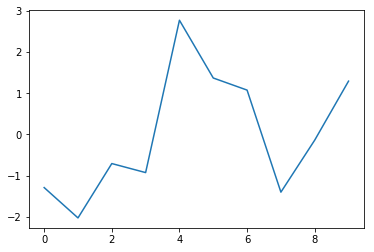

In [100]:
s.plot()

In [102]:
df=pd.DataFrame({
    "normal":np.random.normal(size=100),
    "gamma":np.random.gamma(1,size=100),
    "posisson":np.random.poisson(size=100)
})

In [103]:
df

,normal,gamma,posisson
0,-0.910955,2.776352,2
1,-0.368100,0.459455,2
2,-0.218882,0.283286,0
3,0.483314,0.656050,0
4,0.167354,0.240521,3
5,-1.308692,0.545188,2
6,0.660406,2.465260,2
7,-1.827912,0.093738,1
8,-0.505692,1.157779,3
9,-0.478550,2.046483,1


In [104]:
df.describe()

,normal,gamma,posisson
count,100.000000,100.000000,100.000000
mean,0.071114,0.962414,1.170000
std,1.020572,0.931275,1.035287
min,-1.972228,0.016389,0.000000
25%,-0.568081,0.273568,0.000000
50%,0.050758,0.683593,1.000000
75%,0.759738,1.215618,2.000000
max,2.872054,4.757808,3.000000


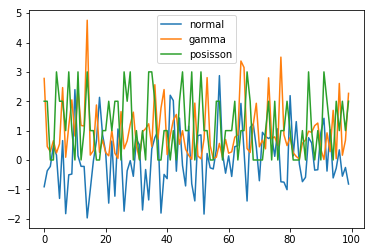

In [105]:
df.plot()

In [106]:
df_cumsum=df.cumsum()

In [107]:
df_cumsum

,normal,gamma,posisson
0,-0.910955,2.776352,2.0
1,-1.279055,3.235807,4.0
2,-1.497937,3.519093,4.0
3,-1.014623,4.175144,4.0
4,-0.847270,4.415665,7.0
5,-2.155962,4.960853,9.0
6,-1.495556,7.426113,11.0
7,-3.323468,7.519851,12.0
8,-3.829160,8.677630,15.0
9,-4.307710,10.724113,16.0


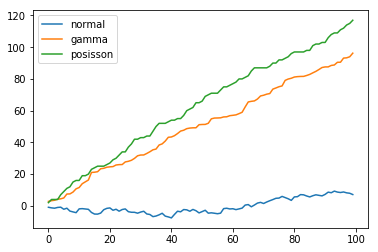

In [109]:
df_cumsum.plot()

## 柱状图

In [110]:
data={
    "name":["zhangsan","lisi","wangwu","xiaoming","peter"],
    "sex":["female","female","male","male","male"],
    "year":[2001,2001,2003,2002,2002],
    "city":["beijing","shanghai","guangzhou","beijing","beijing"]
}
df=pd.DataFrame(data)

In [111]:
df

,name,sex,year,city
0,zhangsan,female,2001,beijing
1,lisi,female,2001,shanghai
2,wangwu,male,2003,guangzhou
3,xiaoming,male,2002,beijing
4,peter,male,2002,beijing


In [112]:
df["sex"].value_counts()

male      3
female    2
Name: sex, dtype: int64

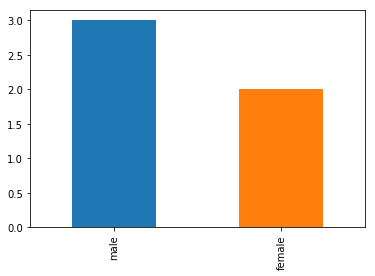

In [113]:
df["sex"].value_counts().plot(kind="bar")

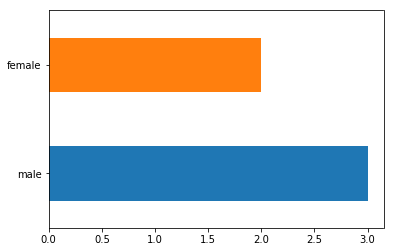

In [114]:
df["sex"].value_counts().plot(kind="barh")

In [115]:
df2=pd.DataFrame(np.random.randint(0,100,size=(3,3)),
                index=["one","two","three"],
                columns=list("abc"))

In [116]:
df2

,a,b,c
one,53,6,79
two,11,8,43
three,13,32,31


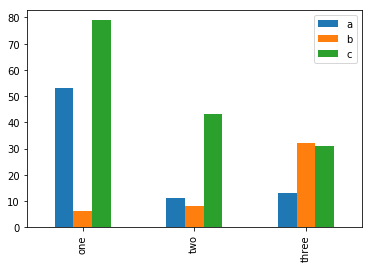

In [117]:
df2.plot(kind="bar")

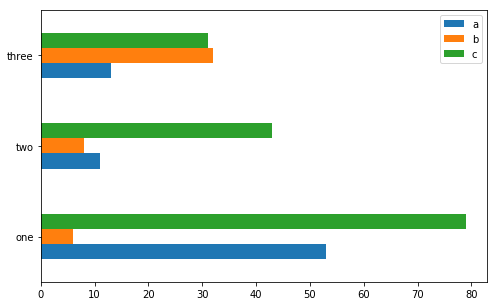

In [121]:
df2.plot(kind="barh",figsize=(8,5))

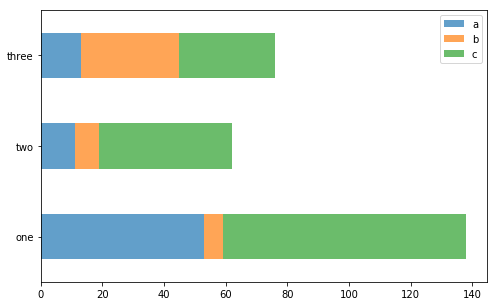

In [126]:
df2.plot(kind="barh",figsize=(8,5),stacked=True,alpha=0.7)
# 参数 alpha 代表颜色透明度，值越小越透明

## 直方图和密度图

In [127]:
s=pd.Series(np.random.normal(size=100))

In [129]:
s

0     2.485056
1    -0.338603
2    -1.221558
3    -1.098633
4    -0.676336
5     0.590831
6    -0.547718
7    -2.015872
8    -0.298616
9    -0.386383
10    0.475452
11    1.014474
12   -1.696072
13    0.369774
14    1.910729
15    0.263717
16   -0.014727
17    2.049649
18   -0.063277
19   -0.881937
20   -1.995325
21   -0.186215
22    0.609150
23   -0.069145
24   -0.441272
25    1.020512
26   -0.160950
27   -0.816129
28   -0.295319
29   -0.714170
        ...   
70    1.573142
71   -1.436502
72    0.753321
73    0.585161
74    0.956862
75   -0.358553
76   -0.800970
77   -0.145534
78    1.095449
79   -0.152819
80   -0.438722
81   -0.886473
82    0.963349
83   -0.501788
84    0.311060
85   -1.083008
86   -0.754949
87    2.052223
88   -1.175385
89   -0.458258
90    1.213806
91    1.368918
92   -0.405991
93    1.230137
94   -1.796084
95   -0.983067
96    1.174471
97    0.181093
98   -0.973921
99   -0.620878
Length: 100, dtype: float64

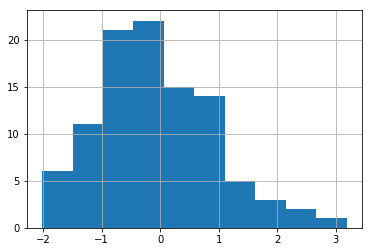

In [133]:
s.hist(bins=10,grid=True)

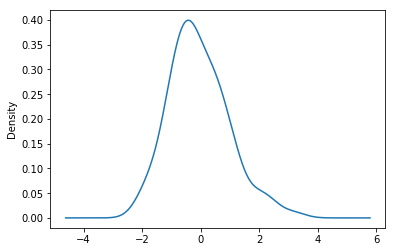

In [137]:
s.plot(kind="kde")
# kde: kernel density estimate

## 散点图

In [140]:
df3=pd.DataFrame(np.arange(10),columns=["x"])
df3['y']=2*df3['x']+5

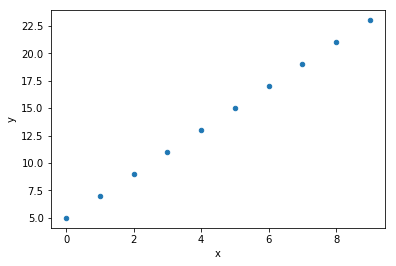

In [141]:
df3.plot(kind="scatter",x="x",y='y')

# 6. 综合示例

数据分析的基本流程
- 收集数据
- 定义问题
- 数据清洗与整理
- 数据探索
- 数据展示

In [142]:
# 从第三方库seaborn自带的数据集中导入小费数据集
import numpy as np
import seaborn as sns
import pandas as pd

In [144]:
tips=sns.load_dataset('tips')

In [146]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [147]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [149]:
tips.shape

(244, 7)

In [152]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


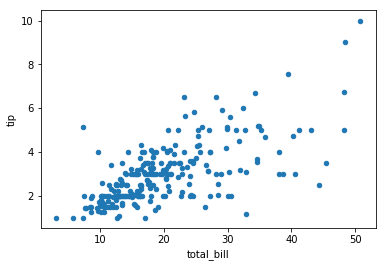

In [154]:
tips.plot(kind="scatter",x="total_bill",y="tip")

In [155]:
male_tip=tips[tips["sex"]=="Male"]["tip"].mean()
female_tip=tips[tips["sex"]=="Female"]["tip"].mean()

In [156]:
s=pd.Series([male_tip,female_tip],index=["male","female"])

In [157]:
s

male      3.089618
female    2.833448
dtype: float64

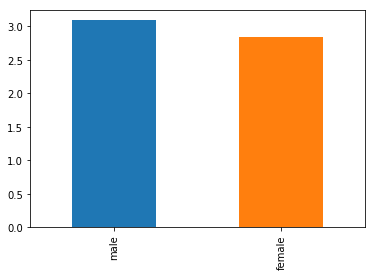

In [158]:
s.plot(kind="bar")

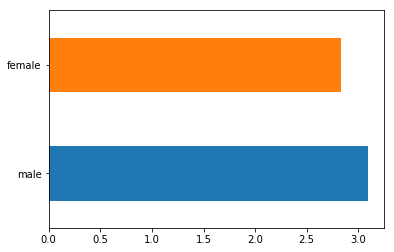

In [159]:
s.plot(kind="barh")

In [160]:
tips.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [162]:
tips["percent_tip"]=tips.tip/(tips.total_bill+tips.tip)

In [163]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.056111
1,10.34,1.66,Male,No,Sun,Dinner,3,0.138333
2,21.01,3.50,Male,No,Sun,Dinner,3,0.142799
3,23.68,3.31,Male,No,Sun,Dinner,2,0.122638
4,24.59,3.61,Female,No,Sun,Dinner,4,0.128014


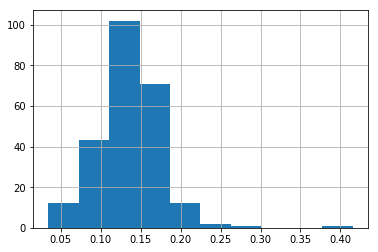

In [164]:
tips.percent_tip.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207C202FCF8>,
      dtype=object)

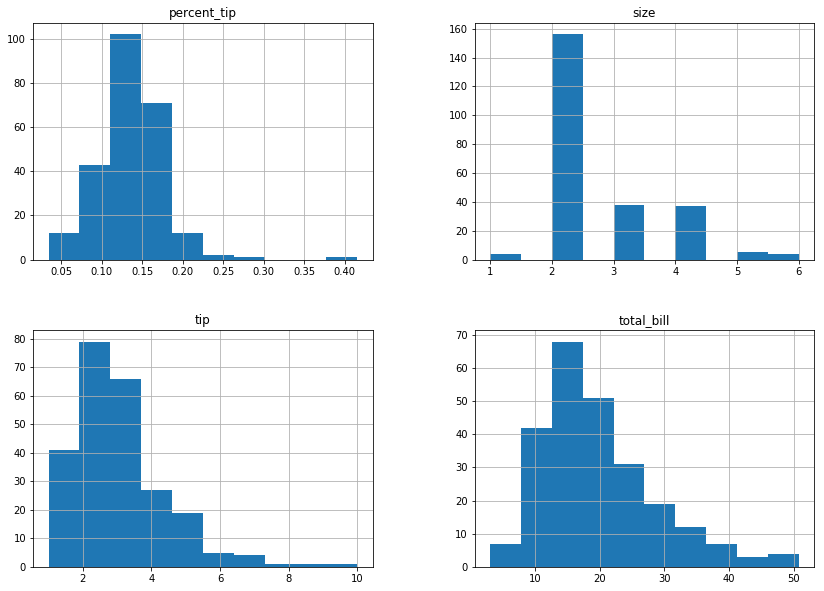

In [167]:
tips.hist(figsize=(14,10))